# Prediction of Bond Strength Using the Omicron Variant
# Experiment Two Train on 90% of the RBD-ACE2 OV Dataset and Evaluate the models on the remaining 10% of the Dataset]

In [ ]:
#Import packages
#Loading the dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import pickle
df = pd.read_excel("/Users/mateen/Downloads/Data 2/allbonding-RBD-ACE2-OV.xlsx")

In [3]:
#Declaring the Feature Variable
X = df.drop(['Unnamed: 5','Unnamed: 15','Atom1','Atom2','Unnamed: 25','BO', "Atom2.1","Atom1.1"], axis=1)


In [4]:
#Declaring the Target Variable (Bond Order)
y = df["BO"]

In [5]:
#Dataset Splitting. Training (90%) Testing (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
X_test_copy = X_test.copy()

In [7]:
X_test_copy

,bond,BL,Ele1,x1,y1,z1,PDBele1,AA1,SeqNo1,ChainN1,Ele2,x2,y2,z2,PDBele2,AA2,SeqNo2,ChainN2
24478,N...H,4.0065,N,21.138,11.446,16.099,N,ASN,338,A,H,18.856,13.393,13.443,HZ3,LYS,341,A
23112,N-H,1.0256,N,33.548,30.633,19.477,N,TRP,349,A,H,33.672,29.801,20.063,H,TRP,349,A
21857,N-C,3.6908,N,29.727,50.290,67.496,NH2,ARG,357,B,C,27.161,48.004,66.152,CD,ARG,357,B
7315,H-C,1.1038,H,24.973,36.710,35.953,HA,PHE,497,B,C,24.039,36.567,36.522,CA,PHE,497,B
10830,H-C,4.0820,H,28.788,36.907,47.814,HA,ARG,509,B,C,26.213,39.160,45.589,CB,VAL,401,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16481,H-H,3.8098,H,29.928,39.063,66.115,HG22,ILE,358,B,H,27.625,38.796,63.092,HD12,ILE,358,B
5365,C-O,4.3505,C,31.392,39.488,40.250,CA,ARG,403,B,O,33.956,37.969,37.080,O,GLY,504,B
5763,H-C,1.0919,H,34.291,46.846,49.801,HD2,TYR,423,B,C,33.631,46.992,50.658,CD2,TYR,423,B
12915,H-C,4.3863,H,24.052,43.339,50.945,HB1,ALA,348,B,C,23.839,47.693,50.463,C,ALA,352,B


In [8]:
#Data Preprocessing (Label Encoding)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
X['bond'] = label_encoder.fit_transform(X['bond'])
X['Ele1'] = label_encoder.fit_transform(X['Ele1'])
X['Ele2'] = label_encoder.fit_transform(X['Ele2'])
X['PDBele1'] = label_encoder.fit_transform(X['PDBele1'])
X['AA1'] = label_encoder.fit_transform(X['AA1'])
X['PDBele2'] = label_encoder.fit_transform(X['PDBele2'])
X['ChainN1'] = label_encoder.fit_transform(X['ChainN1'])
X['ChainN2'] = label_encoder.fit_transform(X['ChainN2'])
X['AA2'] = label_encoder.fit_transform(X['AA2'])

In [9]:
X

,bond,BL,Ele1,x1,y1,z1,PDBele1,AA1,SeqNo1,ChainN1,Ele2,x2,y2,z2,PDBele2,AA2,SeqNo2,ChainN2
0,0,1.3785,0,36.540,21.920,29.558,10,17,328,0,0,37.435,22.796,30.134,4,17,328,0
1,0,1.3798,0,31.594,38.835,33.486,10,8,505,1,0,32.436,39.128,32.433,5,8,505,1
2,0,1.3800,0,30.852,25.527,9.217,10,8,345,0,0,31.504,26.686,9.588,5,8,345,0
3,0,1.3800,0,22.513,42.417,19.756,10,17,69,0,0,23.078,41.669,18.743,4,17,69,0
4,0,1.3809,0,25.130,27.853,22.166,10,17,48,0,0,24.447,26.927,22.930,4,17,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25748,16,2.0303,4,20.580,64.570,33.388,78,4,480,1,4,20.180,64.142,31.445,82,4,488,1
25749,16,2.0322,4,26.409,18.597,12.597,78,4,344,0,4,27.628,18.536,14.221,82,4,361,0
25750,16,2.0376,4,41.780,37.592,58.609,78,4,379,1,4,40.196,38.552,59.457,82,4,432,1
25751,16,2.0381,4,30.525,36.767,68.469,78,4,336,1,4,29.252,37.889,69.599,82,4,361,1


In [10]:
y = df["BO"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
#Training the Decision Tree Regressor
regressor = DecisionTreeRegressor()
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['mse', 'mae']
}
grid_search = GridSearchCV(regressor, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [47]:
print("Best parameters:", grid_search.best_params_)
print("Lowest RMSE: ", (-grid_search.best_score_)**(1/2.0))

Best parameters: {'criterion': 'mse', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Lowest RMSE:  0.008451587582200491


In [15]:
#Saving the best model
best_params_dt = grid_search.best_params_
best_estimator_dt = grid_search.best_estimator_

import pickle
pickle.dump(best_estimator_dt, open('/Users/mateen/DT_wt.pkl', 'wb'))
pickled_model = pickle.load(open('/Users/mateen/DT_ov.pkl', 'rb'))
y_grid_dt = pickled_model.predict(X_test)

/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [16]:
#Loading the model for Evaluation
import pickle
pickled_model = pickle.load(open('/Users/mateen/DT_ov.pkl', 'rb'))

In [17]:
#Evaluating the Decision Tree Model
true_mean = np.mean(y_test)
squared_error_num = np.sum(np.abs(y_test - y_grid_dt))
squared_error_den = np.sum(np.abs(y_test - true_mean))
rae_loss = squared_error_num / squared_error_den

mse = mean_squared_error(y_test,y_grid_dt)
mae = mean_absolute_error(y_test, y_grid_dt)
r2 = r2_score(y_test, y_grid_dt)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"RAE: {rae_loss}")
print(f"RMSE: {rmse}")

Mean Squared Error: 8.699814164403062e-05
Mean Absolute Error: 0.002937504034167688
R-squared: 0.996377043047301
RAE: 0.024852810206276655
RMSE: 0.00932727943422039


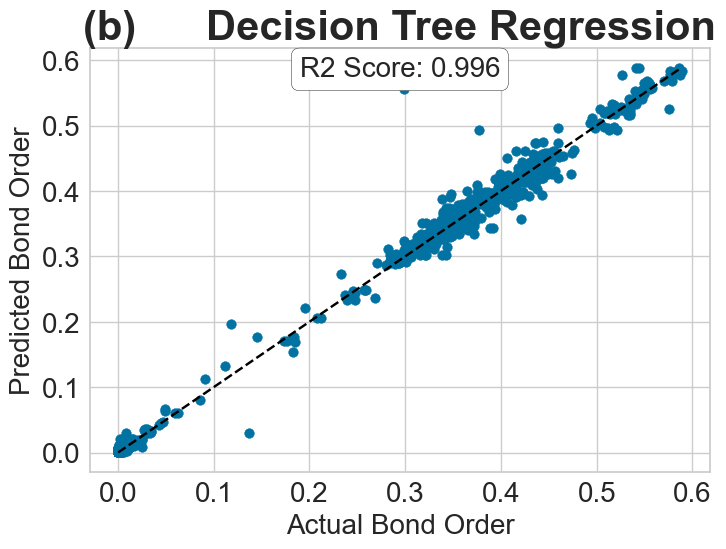

In [20]:
#Visualizing the model
#plt.annotate(f"R-squared: {r2:.3f}", (0.7, 0.8), fontsize=12)

#plt.rcParams['font.size'] = 40 

#fig, ax = plt.subplots()
#plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_grid_dt)
#ax.set_xticklabels(ax.get_xticks(), fontsize=10)
#ax.set_xticklabels(ax.get_yticks(), fontsize=14)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#ax.scatter(y_test, y_grid_dt, s=40)

plt.annotate(f'R2 Score: {r2:.3f}', xy=(min(y_test), max(y_grid_dt)), xytext=(0.5, 0.95), textcoords='axes fraction', ha='center', va='center', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Line of Best Fit')


plt.xlabel('Actual Bond Order', fontsize=20)
plt.ylabel('Predicted Bond Order', fontsize=20)
#plt.title('(b)    Actual vs. Predicted Values of the Decision Tree Regression', fontsize=32, weight="bold")
plt.title('(b)      Decision Tree Regression', fontsize=30, weight='bold')

plt.savefig("/Users/mateen/Desktop/AMIAA PODIUM/DT_OV.jpg" , dpi=800)
plt.show()

In [69]:
# Training the KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'p': [1, 2],  
}

# Initialize the KNN regressor
knn = KNeighborsRegressor()

# Create a GridSearchCV object with cross-validation (e.g., 5-fold)
grid_search_kn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your training data
grid_search_kn.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params_kn = grid_search_kn.best_params_
best_estimator_kn = grid_search_kn.best_estimator_

# Use the best estimator to make predictions on the test set

pickle.dump(best_estimator_kn, open('/Users/mateen/KN_ov.pkl', 'wb'))

y_grid_kn = best_estimator_kn.predict(X_test)

In [19]:
#Loading the KNN model
y_grid_kn= pickle.load(open('/Users/mateen/KN_ov.pkl', 'rb'))

In [21]:
y_grid_kn = y_grid_kn.predict(X_test)

/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [22]:
#Evaluating the KNN Regressor
true_mean = np.mean(y_test)
squared_error_num = np.sum(np.abs(y_test - y_grid_kn))
squared_error_den = np.sum(np.abs(y_test - true_mean))
rae_loss = squared_error_num / squared_error_den

mse = mean_squared_error(y_test,y_grid_kn)
mae = mean_absolute_error(y_test, y_grid_kn)
r2 = r2_score(y_test, y_grid_kn)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"RAE: {rae_loss}")
print(f"RMSE: {rmse}")

Mean Squared Error: 0.0158815372087756
Mean Absolute Error: 0.08580810784552809
R-squared: 0.33862810673003096
RAE: 0.7259811709667563
RMSE: 0.1260219711350985


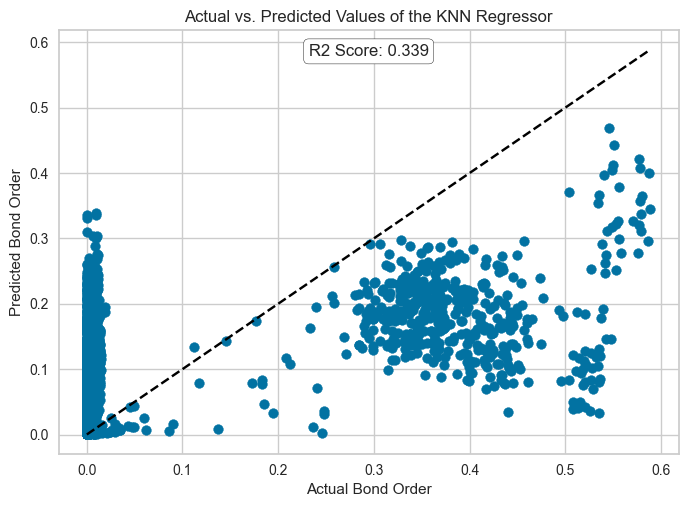

In [24]:
#Visualizing the KNN Regressor
#plt.annotate(f"R-squared: {r2:.3f}", (0.7, 0.8), fontsize=12)
plt.scatter(y_test, y_grid_kn)

plt.annotate(f'R2 Score: {r2:.3f}', xy=(min(y_test), max(y_grid_kn)), xytext=(0.5, 0.95), textcoords='axes fraction', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Line of Best Fit')


plt.xlabel('Actual Bond Order')
plt.ylabel('Predicted Bond Order')
plt.title('Actual vs. Predicted Values of the KNN Regressor')

plt.savefig("/Users/mateen/Desktop/AMIAA PODIUM/KNN_OV.jpg" , dpi=400)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xg.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [31]:
from sklearn.model_selection import GridSearchCV
import xgboost as xg

In [ ]:
#Training the XGB Regressor
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xg.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params, cv= 10,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

# Get the best hyperparameters and the best estimator
best_params_clf = clf.best_params_
best_estimator_clf = clf.best_estimator_

# Use the best estimator to make predictions on the test set

pickle.dump(best_estimator_clf, open('/Users/mateen/XG_ov.pkl', 'wb'))

y_grid_XG = best_estimator_kn.predict(X_test)

In [21]:
#Loading the XGB Regressor
pickled_model = pickle.load(open('/Users/mateen/XG_ov.pkl', 'rb'))

/Users/mateen/Bond_Project/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:05:07] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


In [22]:
y_grid_XG = pickled_model.predict(X_test)

In [23]:
#Evaluating the XGB Regressor
true_mean = np.mean(y_test)
squared_error_num = np.sum(np.abs(y_test - y_grid_XG))
squared_error_den = np.sum(np.abs(y_test - true_mean))
rae_loss = squared_error_num / squared_error_den

mse = mean_squared_error(y_test,y_grid_XG)
mae = mean_absolute_error(y_test, y_grid_XG)
r2 = r2_score(y_test, y_grid_XG)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"RAE: {rae_loss}")
print(f"RMSE: {rmse}")

Mean Squared Error: 4.0835882240235305e-05
Mean Absolute Error: 0.0033155915628011734
R-squared: 0.9982994275430939
RAE: 0.028051627120633887
RMSE: 0.006390295943087089


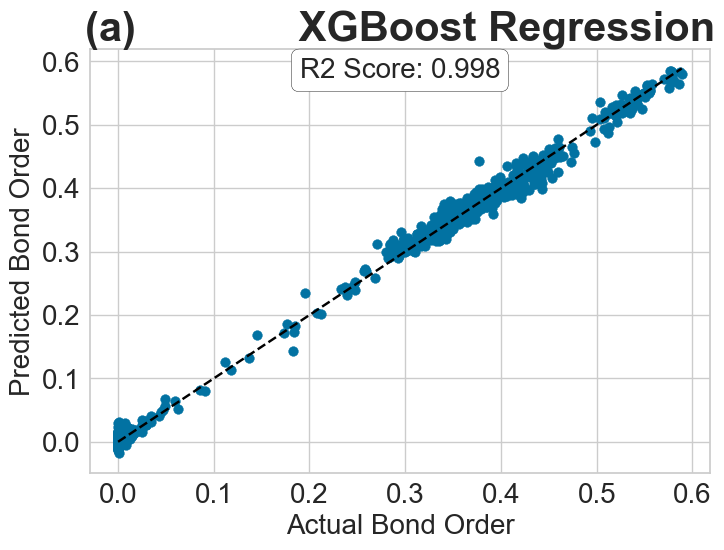

In [25]:
# Visualizing the XGB Regressor
#plt.annotate(f"R-squared: {r2:.3f}", (0.7, 0.8), fontsize=12)

#plt.rcParams['font.size'] = 40 

#fig, ax = plt.subplots()
#plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_grid_XG)
#ax.set_xticklabels(ax.get_xticks(), fontsize=10)
#ax.set_xticklabels(ax.get_yticks(), fontsize=14)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#ax.scatter(y_test, y_grid_dt, s=40)

plt.annotate(f'R2 Score: {r2:.3f}', xy=(min(y_test), max(y_grid_dt)), xytext=(0.5, 0.95), textcoords='axes fraction', ha='center', va='center', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Line of Best Fit')


plt.xlabel('Actual Bond Order', fontsize=20)
plt.ylabel('Predicted Bond Order', fontsize=20)
#plt.title('(a)    Actual vs. Predicted Values of the XGBoost Regression', fontsize=16, weight="bold")
plt.title('(a)              XGBoost Regression', fontsize=30, weight='bold')

plt.savefig("/Users/mateen/Desktop/AMIAA PODIUM/XGB_OV.jpg" , dpi=800)
plt.show()

In [24]:
#Training the Ridge Regressor
from sklearn.linear_model import Ridge
ridge = Ridge()
param_grid = {
    'alpha': [0.1, 1, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
pickle.dump(best_model, open('/Users/mateen/LR_OV.pkl', 'wb'))

y_grid = best_model.predict(X_test)

In [26]:
# Loading the Ridge Regressor
pickled_model = pickle.load(open('/Users/mateen/LR_ov.pkl', 'rb'))

In [27]:
y_grid = pickled_model.predict(X_test)

/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [28]:
#Evaluating the Ridge Regressor
true_mean = np.mean(y_test)
squared_error_num = np.sum(np.abs(y_test - y_grid))
squared_error_den = np.sum(np.abs(y_test - true_mean))
rae_loss = squared_error_num / squared_error_den

mse = mean_squared_error(y_test,y_grid)
mae = mean_absolute_error(y_test, y_grid)
r2 = r2_score(y_test, y_grid)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"RAE: {rae_loss}")
print(f"RMSE: {rmse}")

Mean Squared Error: 0.0041676019150767895
Mean Absolute Error: 0.04788461071223328
R-squared: 0.8264440820346517
RAE: 0.40512868339592567
RMSE: 0.06455696643335086


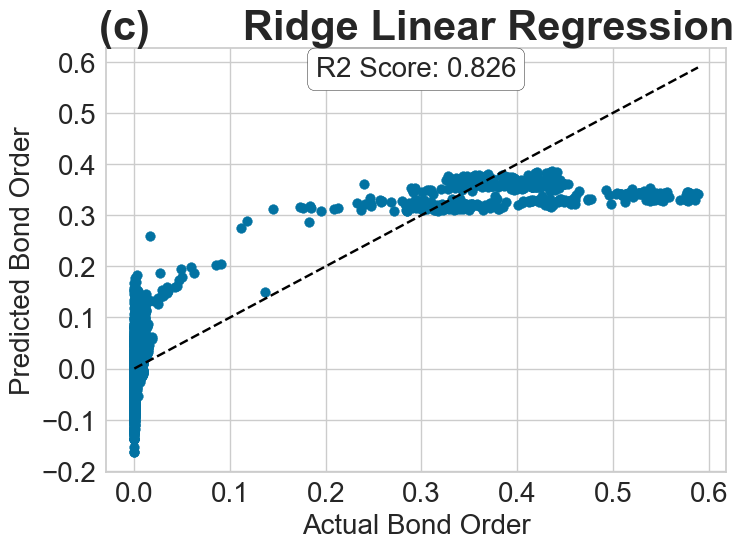

In [29]:
#Visualizing the Ridge Regressor
#plt.annotate(f"R-squared: {r2:.3f}", (0.7, 0.8), fontsize=12)

#plt.rcParams['font.size'] = 40 

#fig, ax = plt.subplots()
#plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_grid)
#ax.set_xticklabels(ax.get_xticks(), fontsize=10)
#ax.set_xticklabels(ax.get_yticks(), fontsize=14)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#ax.scatter(y_test, y_grid_dt, s=40)

plt.annotate(f'R2 Score: {r2:.3f}', xy=(min(y_test), max(y_grid_dt)), xytext=(0.5, 0.95), textcoords='axes fraction', ha='center', va='center', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Line of Best Fit')


plt.xlabel('Actual Bond Order', fontsize=20)
plt.ylabel('Predicted Bond Order', fontsize=20)
#plt.title('(c)    Actual vs. Predicted Values of the Ridge Linear Regression', fontsize=16,weight="bold")
plt.title('(c)        Ridge Linear Regression', fontsize=30, weight='bold')

plt.savefig("/Users/mateen/Desktop/AMIAA PODIUM/Ridge_OV.jpg" , dpi=800)
plt.show()

In [28]:
#Training the Lasso Regressor
from sklearn.linear_model import Lasso
lasso = Lasso()
param_grid = {
    'alpha': [0.1, 1, 10],
    'max_iter': [100, 500, 1000],
    'tol': [1e-3, 1e-4, 1e-5],
}
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
pickle.dump(best_model, open('/Users/mateen/LRlarso_ov.pkl', 'wb'))
y_grid = best_model.predict(X_test)
print(best_params)

{'alpha': 0.1, 'max_iter': 100, 'tol': 0.001}


In [17]:
#Loading the Lasso Regressor
#Evaluating the Lasso Regression
true_mean = np.mean(y_test)
squared_error_num = np.sum(np.abs(y_test - y_grid_lasso))
squared_error_den = np.sum(np.abs(y_test - true_mean))
rae_loss = squared_error_num / squared_error_den

mse = mean_squared_error(y_test,y_grid_lasso)
mae = mean_absolute_error(y_test, y_grid_lasso)
r2 = r2_score(y_test, y_grid_lasso)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"RAE: {rae_loss}")
print(f"RMSE: {rmse}")

Mean Squared Error: 0.013356660061090677
Mean Absolute Error: 0.08421267571454957
R-squared: 0.4437742747291674
RAE: 0.7124829862878578
RMSE: 0.11557101739229726


In [12]:
pickled_model2 = pickle.load(open('/Users/mateen/LRlarso_ov.pkl', 'rb'))

In [13]:
y_grid_lasso = pickled_model2.predict(X_test)

/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


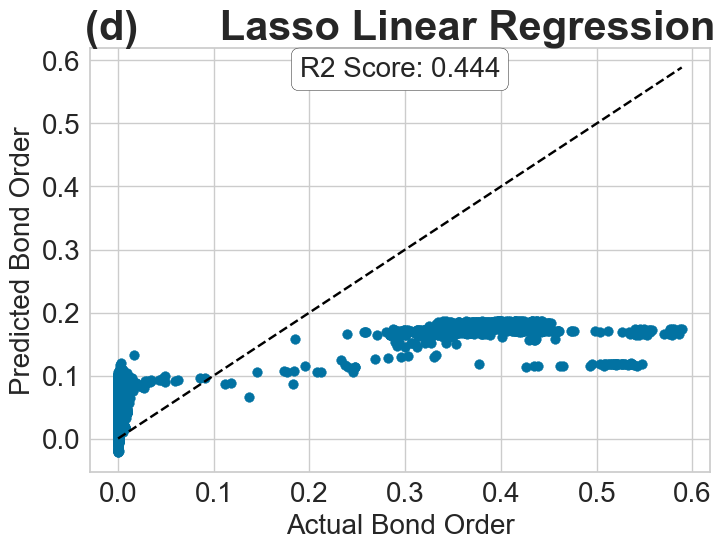

In [18]:
#Visualizing Lasso regression
#plt.annotate(f"R-squared: {r2:.3f}", (0.7, 0.8), fontsize=12)

#plt.rcParams['font.size'] = 40 

#fig, ax = plt.subplots()
#plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_grid_lasso)
#ax.set_xticklabels(ax.get_xticks(), fontsize=10)
#ax.set_xticklabels(ax.get_yticks(), fontsize=14)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#ax.scatter(y_test, y_grid_dt, s=40)

plt.annotate(f'R2 Score: {r2:.3f}', xy=(min(y_test), max(y_grid_lasso)), xytext=(0.5, 0.95), textcoords='axes fraction', ha='center', va='center', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Line of Best Fit')


plt.xlabel('Actual Bond Order', fontsize=20)
plt.ylabel('Predicted Bond Order', fontsize=20)
#plt.title('(d)    Actual vs. Predicted Values of the Lasso Linear Regression', fontsize=16,weight="bold")
plt.title('(d)       Lasso Linear Regression', fontsize=30, weight='bold')

plt.savefig("/Users/mateen/Desktop/AMIAA PODIUM/lasso_OV.jpg" , dpi=800)
plt.show()